In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("vadodara_house_price_dataset_new.csv")
data.head()

,h_type,location,society,size,bathroom,balcony,total_sqft,yr_built,furniture,sale_type,...,college,hospital,population,railway,airport,on_road,air_quality,restaurant,park,price
0,apartment,Maneja,Bakeri Swara,3 BHK,3,1,1550.0,2011.0,0,new,...,0,1,2,0,0,1,1,1,1,4361705
1,apartment,Maneja,Bakeri Swara,3 BHK,3,1,1550.0,2012.0,1,new,...,0,1,2,0,0,1,1,1,1,5001905
2,apartment,Maneja,Bakeri Swara,3 BHK,3,1,1860.0,2010.0,1,new,...,0,1,2,0,0,1,1,1,1,5588795
3,apartment,Maneja,Bakeri Swara,2 BHK,2,1,1015.0,2016.0,1,new,...,0,1,2,0,0,1,1,1,1,3184740
4,apartment,Maneja,Bakeri Swara,2 BHK,2,1,1210.0,2019.0,0,new,...,0,1,2,0,0,1,1,1,1,3498895


In [3]:
data = data.drop(['society', 'yr_built', 'furniture', 'sale_type', 'amenities', 'market', 'office', 'school', 'college', 'hospital', 'population', 'railway', 'airport', 'on_road', 'air_quality', 'restaurant', 'park'], axis=1)
data.head()

,h_type,location,size,bathroom,balcony,total_sqft,price
0,apartment,Maneja,3 BHK,3,1,1550.0,4361705
1,apartment,Maneja,3 BHK,3,1,1550.0,5001905
2,apartment,Maneja,3 BHK,3,1,1860.0,5588795
3,apartment,Maneja,2 BHK,2,1,1015.0,3184740
4,apartment,Maneja,2 BHK,2,1,1210.0,3498895


In [4]:
data.isnull().sum()

h_type        0
location      0
size          0
bathroom      0
balcony       0
total_sqft    0
price         0
dtype: int64

In [5]:
df = data.iloc[ : , :-1].values
df

array([['apartment', 'Maneja', '3 BHK', 3, 1, 1550.0],
       ['apartment', 'Maneja', '3 BHK', 3, 1, 1550.0],
       ['apartment', 'Maneja', '3 BHK', 3, 1, 1860.0],
       ...,
       ['apartment', 'Gotri', '3 BHK', 3, 3, 1550.0],
       ['apartment', 'Gotri', '3 BHK', 3, 2, 1750.0],
       ['apartment', 'Gotri', '2 BHK', 2, 3, 1200.0]], dtype=object)

In [6]:
label_encoder = LabelEncoder()

In [7]:
df[ : ,0] = label_encoder.fit_transform(df[ : ,0])
df

array([[0, 'Maneja', '3 BHK', 3, 1, 1550.0],
       [0, 'Maneja', '3 BHK', 3, 1, 1550.0],
       [0, 'Maneja', '3 BHK', 3, 1, 1860.0],
       ...,
       [0, 'Gotri', '3 BHK', 3, 3, 1550.0],
       [0, 'Gotri', '3 BHK', 3, 2, 1750.0],
       [0, 'Gotri', '2 BHK', 2, 3, 1200.0]], dtype=object)

In [8]:
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
mapping

{'apartment': 0,
 'duplex': 1,
 'pent house': 2,
 'tenament': 3,
 'triplex': 4,
 'villa': 5}

In [9]:
df[ : ,1] = label_encoder.fit_transform(df[ : ,1])
df

array([[0, 15, '3 BHK', 3, 1, 1550.0],
       [0, 15, '3 BHK', 3, 1, 1550.0],
       [0, 15, '3 BHK', 3, 1, 1860.0],
       ...,
       [0, 8, '3 BHK', 3, 3, 1550.0],
       [0, 8, '3 BHK', 3, 2, 1750.0],
       [0, 8, '2 BHK', 2, 3, 1200.0]], dtype=object)

In [10]:
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
mapping

{'Ajwa Road': 0,
 'Akota': 1,
 'Alkapuri': 2,
 'Atladra': 3,
 'Bhayli': 4,
 'Chhani': 5,
 'Fatehgunj': 6,
 'Gorwa': 7,
 'Gotri': 8,
 'Harni': 9,
 'Karelibaug': 10,
 'Khodiyar Nagar': 11,
 'Laxmipura': 12,
 'Madhav Pura': 13,
 'Mandvi': 14,
 'Maneja': 15,
 'Manjalpur': 16,
 'Navapura': 17,
 'New Alkapuri': 18,
 'New Karelibaugh': 19,
 'New Sama': 20,
 'New VIP Road': 21,
 'Sama': 22,
 'Sayajipura': 23,
 'Soma Talav': 24,
 'Vasant Vihar': 25,
 'Vasna Road': 26,
 'Vasna-Bhayli Road': 27,
 'Waghodia Road': 28}

In [11]:
df[ : ,2] = label_encoder.fit_transform(df[ : ,2])
df

array([[0, 15, 2, 3, 1, 1550.0],
       [0, 15, 2, 3, 1, 1550.0],
       [0, 15, 2, 3, 1, 1860.0],
       ...,
       [0, 8, 2, 3, 3, 1550.0],
       [0, 8, 2, 3, 2, 1750.0],
       [0, 8, 1, 2, 3, 1200.0]], dtype=object)

In [12]:
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
mapping

{'1 BHK': 0, '2 BHK': 1, '3 BHK': 2, '4 BHK': 3, '5 BHK': 4}

In [13]:
data

,h_type,location,size,bathroom,balcony,total_sqft,price
0,apartment,Maneja,3 BHK,3,1,1550.0,4361705
1,apartment,Maneja,3 BHK,3,1,1550.0,5001905
2,apartment,Maneja,3 BHK,3,1,1860.0,5588795
3,apartment,Maneja,2 BHK,2,1,1015.0,3184740
4,apartment,Maneja,2 BHK,2,1,1210.0,3498895
...,...,...,...,...,...,...,...
335,villa,Manjalpur,3 BHK,3,1,1000.0,6300000
336,villa,Manjalpur,4 BHK,3,1,800.0,1010000
337,apartment,Gotri,3 BHK,3,3,1550.0,4100000
338,apartment,Gotri,3 BHK,3,2,1750.0,7700000


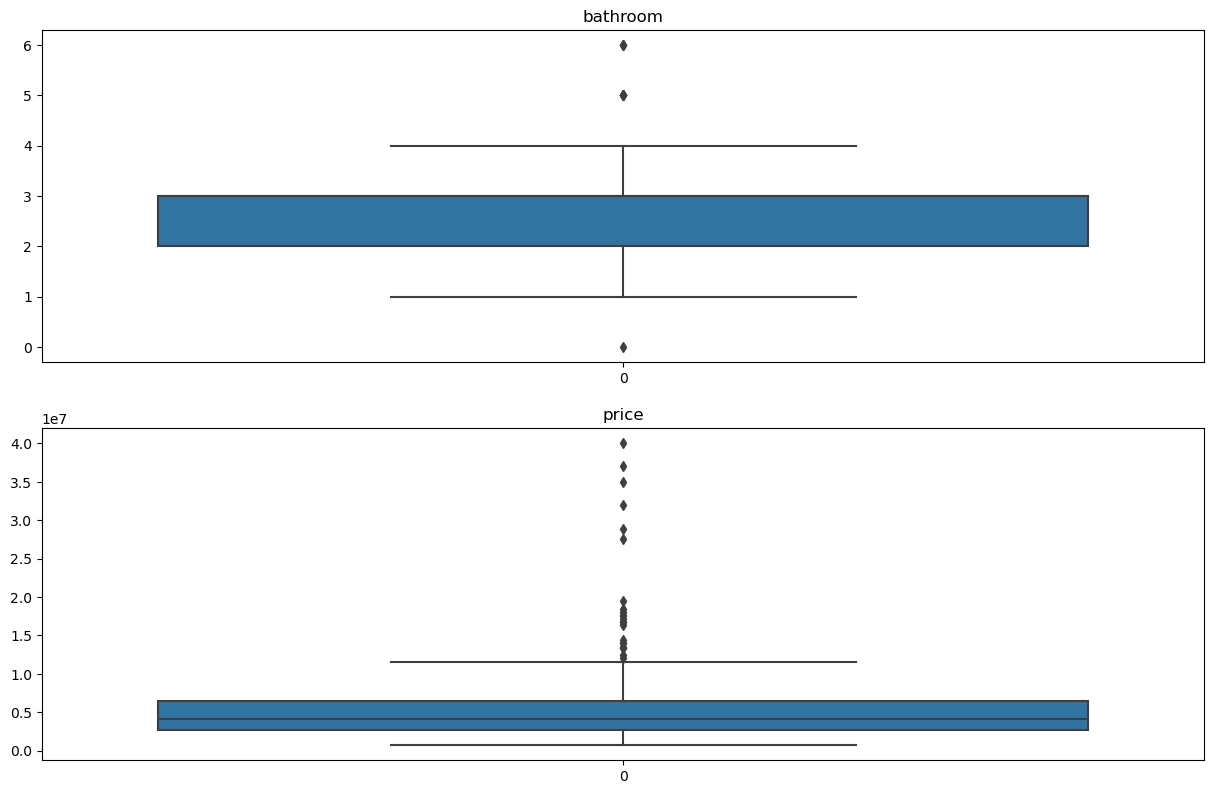

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (15,25))

plt.subplot(5,1,1)
sns.boxplot(data['bathroom'] )
plt.title('bathroom')

plt.subplot(5,1,2)
sns.boxplot(data['price'] )
plt.title('price')



plt.show()

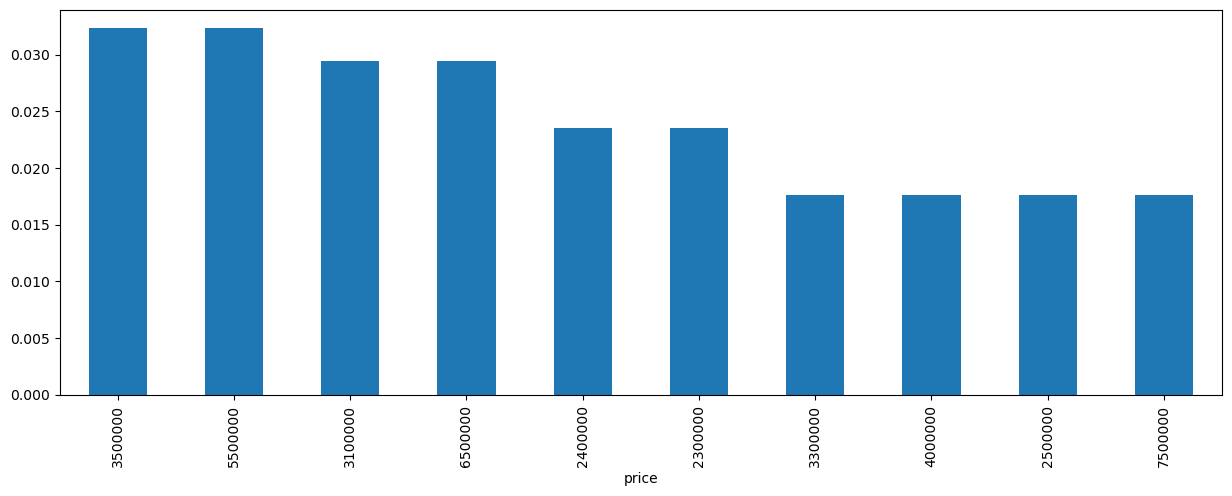

In [15]:
plt.figure(figsize = (15,5))
data['price'].value_counts(normalize = True).head(10).plot.bar()
plt.show()

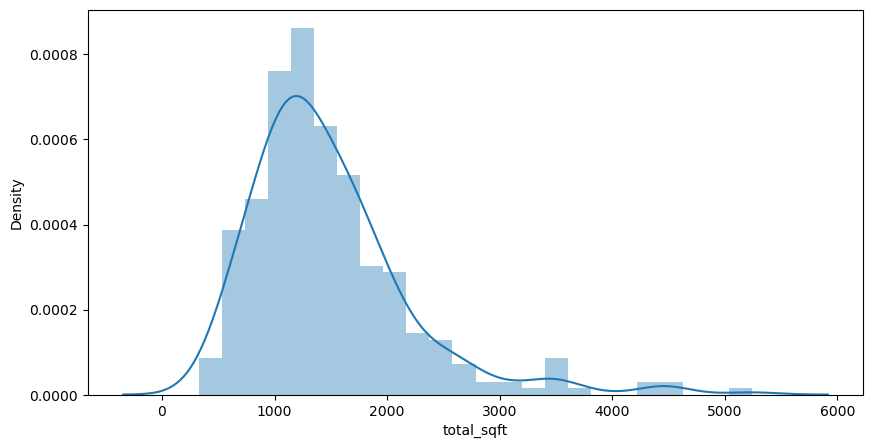

In [16]:
plt.figure(figsize = (10,5))
sns.distplot(data['total_sqft'])
plt.show()

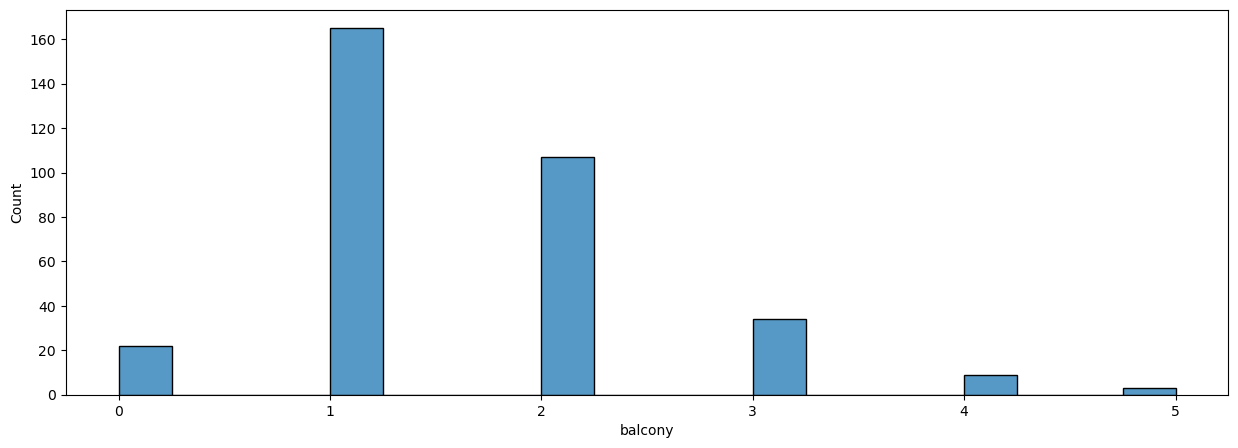

In [17]:
plt.figure(figsize = (15,5))
sns.histplot(data['balcony'] , bins = 20)
plt.show()

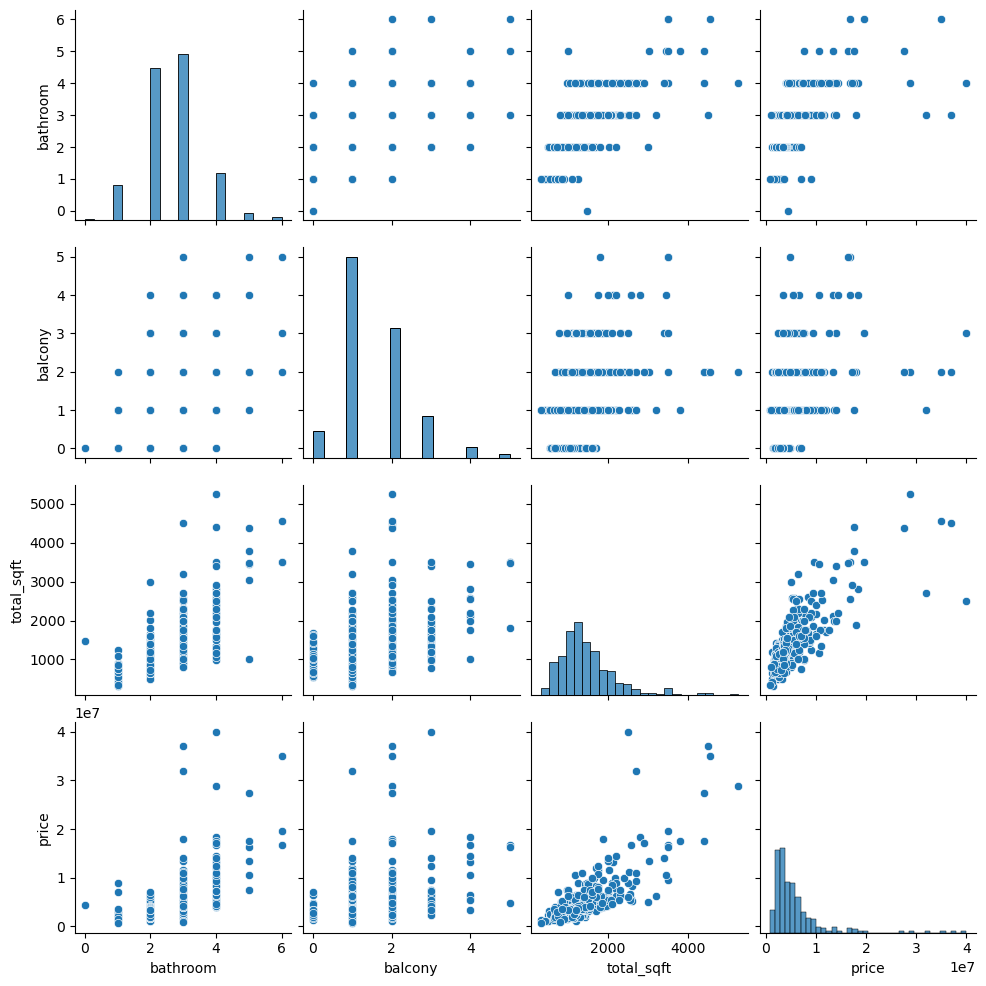

In [18]:
sns.pairplot(data)

In [19]:
data.describe()

,bathroom,balcony,total_sqft,price
count,340.000000,340.000000,340.000000,3.400000e+02
mean,2.629412,1.564706,1477.644735,5.528375e+06
std,0.930166,0.917828,721.120773,5.053439e+06
min,0.000000,0.000000,330.000000,7.000000e+05
25%,2.000000,1.000000,1031.500000,2.740750e+06
50%,3.000000,1.000000,1329.500000,4.095500e+06
75%,3.000000,2.000000,1750.000000,6.395000e+06
max,6.000000,5.000000,5241.000000,4.000000e+07


<Figure size 1000x800 with 0 Axes>

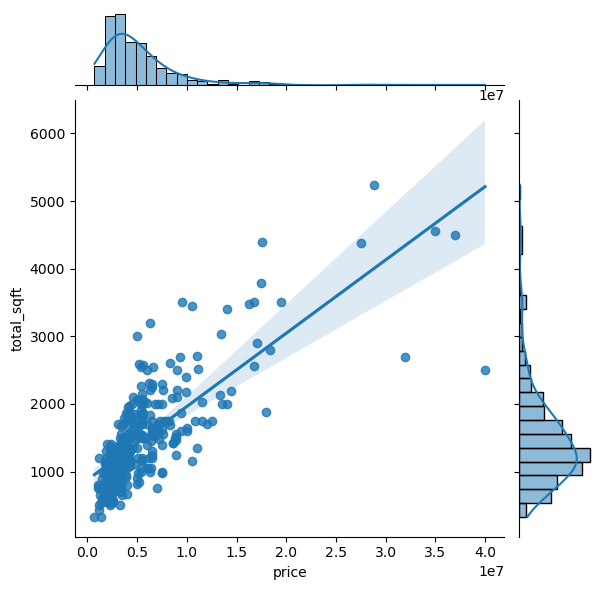

In [20]:
plt.figure(figsize = (10,8))
sns.jointplot(x = data['price'] , y = data['total_sqft'] , kind = 'reg')
plt.show()

In [21]:
y = data.price.values
X = df

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.2)

In [23]:
standard_x = StandardScaler()

In [24]:
X_train = standard_x.fit_transform(X_train)
X_val = standard_x.transform(X_val)

In [25]:
X

array([[0, 15, 2, 3, 1, 1550.0],
       [0, 15, 2, 3, 1, 1550.0],
       [0, 15, 2, 3, 1, 1860.0],
       ...,
       [0, 8, 2, 3, 3, 1550.0],
       [0, 8, 2, 3, 2, 1750.0],
       [0, 8, 1, 2, 3, 1200.0]], dtype=object)

In [26]:
y

array([ 4361705,  5001905,  5588795,  3184740,  3498895,  8353084,
        1900000,  1200000,  3401000,  1100000,  1951000,  6000000,
        3350000,  3750000,  3300000,  4100000,  5500000,  2300000,
        2300000,  2400000,  5100000,  6750000,  9000000,  2300000,
        2700000,  3300000,  4050000,  4100000,  2190000,  3251000,
        4801000,  4940000,  2250000,  2950000,  4550000,  4300000,
        3400000,  6360000,  4250000,  3620000,  4020000,  4221000,
        1750000,  1900000,  2300000,  9445000,  2851000,  3751000,
        3000000,  4300000,  2350000,  1575000,  2225000,  1711000,
        8880000,  8880000,  6000000,  2600000,  3500000,  2500000,
        1400000,  1600000,  1800000,  2300000,  4500000,  1651000,
        2700000,  4000000,  2300000,  6500000,  3900000,  2400000,
        2688000,  3570000,  3801000,  4243000,  4000000,  5602000,
        4201000,  5390000,  5500000,  6500000,  7600000,  3401000,
        9503000,  2535000,  2725000,  4100000,  4201000,  3450

In [27]:
print('Train_Shape: ',X_train.shape)
print("\nX_train:")
X_train

Train_Shape:  (272, 6)

X_train:


array([[-0.38479189,  0.18863509,  0.37169928,  0.4108774 , -0.60370721,
         0.09853138],
       [ 0.52532459, -1.02773603,  1.54730629,  1.46520433, -0.60370721,
         0.29612764],
       [ 4.1657905 , -1.13831522,  0.37169928,  0.4108774 ,  0.47661095,
         0.29612764],
       ...,
       [-0.38479189, -1.02773603,  1.54730629,  1.46520433,  1.55692911,
         2.53555199],
       [-0.38479189,  0.18863509,  0.37169928,  0.4108774 , -0.60370721,
         0.50689699],
       [-0.38479189, -0.47484006, -0.80390774, -0.64344952, -0.60370721,
        -0.69844023]])

In [28]:
print('Val_Shape: ',X_val.shape)
print("\nX_val:")
X_val

Val_Shape:  (68, 6)

X_val:


array([[-0.38479189,  1.6261646 ,  0.37169928,  0.4108774 , -0.60370721,
        -0.56407477],
       [-0.38479189,  1.40500621,  0.37169928,  0.4108774 , -0.60370721,
         0.09853138],
       [-0.38479189, -0.36426087,  0.37169928,  0.4108774 ,  0.47661095,
         1.37368595],
       [-0.38479189, -1.4700528 , -1.97951476, -1.69777645, -0.60370721,
        -0.95531537],
       [ 0.52532459, -0.80657764,  0.37169928,  0.4108774 ,  0.47661095,
         0.53587778],
       [-0.38479189, -0.36426087, -0.80390774, -1.69777645, -0.60370721,
        -0.94214229],
       [-0.38479189, -0.47484006, -0.80390774, -0.64344952, -0.60370721,
        -0.20576687],
       [ 0.52532459, -1.4700528 ,  0.37169928,  1.46520433, -0.60370721,
         0.69132018],
       [-0.38479189, -0.47484006,  0.37169928,  0.4108774 , -0.60370721,
         1.46984946],
       [-0.38479189,  0.96268944, -0.80390774, -0.64344952, -0.60370721,
        -1.03040195],
       [-0.38479189, -0.36426087,  0.37169928,  0.

In [29]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)

In [30]:
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [31]:
accuracy = regressor.score(X_val, y_val)

In [32]:
print(accuracy*100, '%')

34.6571630785448 %


In [33]:
predictions = regressor.predict(X_val)

In [34]:
predictions

array([ 3949200.        ,  5277469.5       ,  7238100.        ,
        2419950.        ,  5209600.        ,  6415100.        ,
        3444100.        ,  9740200.        ,  9060400.        ,
        3025300.        ,  5544600.        ,  9004000.        ,
        2500000.        ,  3487600.        ,  6791200.        ,
        8727000.        , 10170000.        ,  8441200.        ,
        7063700.        ,  3043500.        ,  6980400.        ,
        3503900.        ,  5279100.        ,  1540000.        ,
        3137500.        ,  4370000.        ,  3282500.        ,
        2818800.        ,  2947441.66666667,  5730000.        ,
        3060000.        ,  3601300.        , 10006600.        ,
        5910779.5       ,  5789900.        ,  4898000.        ,
        5460000.        ,  3835000.        ,  5177700.        ,
        6828100.        ,  2407500.        ,  3362700.        ,
        4293779.5       ,  5462600.        ,  5065600.        ,
       11180000.        ,  8003000.     

In [35]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_val)


# Evaluate the model
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_val, y_pred)
print(f'Mean Squared Error: {mse}')
r2=r2_score(y_val, y_pred)
print(r2)

Mean Squared Error: 8035355472618.936
0.4054130876790035


In [36]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X, y = make_classification(n_samples=1000, n_features=20, random_state=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=100)
adaboost_classifier.fit(X_train, y_train)
y_pred = adaboost_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.93


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
random_forest = RandomForestClassifier()
random_forest.fit(X_train_imputed, y_train)
y_pred = random_forest.predict(X_test_imputed)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.925
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        90
           1       0.94      0.92      0.93       110

    accuracy                           0.93       200
   macro avg       0.92      0.93      0.92       200
weighted avg       0.93      0.93      0.93       200



In [38]:
filename = 'vadodara_house_model.pkl'

In [39]:
pickle.dump(model, open(filename, 'wb'))

In [40]:
loaded_model = pickle.load(open(filename, 'rb'))